# Example data analysis notebook

This notebook downloads and analyses some surface air temperature anomaly data from [Berkeley Earth](http://berkeleyearth.org/).

Import the required libraries.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import requests

Define functions here

In [28]:
def generate_url(location):
    '''generates a url for the given region
    
    Parameters
    ----------
    
    location: str
        name of the region
        
    Returns
    -------
    
    url: str
        url for the temperature data of the region
    '''
    
    # f-strings allows us to insert a variable into a string
    url = f'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/{location.lower()}-TAVG-Trend.txt'
    
    return url


def download_data(location):
    '''downloads temperature anomaly data from Berkeley Earth for a given location
    
    Parameters
    ----------
    
    location: str
        name of the region
    
    Returns
    -------
    
    data: 2D numpy float array
        data table
    '''
    
    # Define the URL
    url = generate_url("Australia")
    
    '''
    
    This is kind of inefficient as it creates a file on the disk.
    
    # Download the content of the URL
    response = requests.get(url)
    # Save it to a file
    with open("data.txt", 'w') as open_file:
        open_file.write(response.text)
        
    # load data into a numpy array
    data = np.loadtxt("data.txt", comments="%")
    '''
    
    # Download the content of the URL
    response = requests.get(url)
    
    # directly read the data into a numpy array
    data = np.loadtxt(response.iter_lines(), comments='%')
    
    return data

def moving_avg(data,width):
    '''calculates moving average of temperature anomaly data
    
    Parameters
    ----------
    data: 1D numpy float array
        temperature data
    width: int
        width of the moving window used for averaging
    
    Returns
    -------
    moving_avg: 1D numy float array
        averaged data
    '''
    
    moving_avg = np.full(data.size, np.nan)
    for i in range(width, moving_avg.size - width):
        moving_avg[i] = np.mean(data[i - width:i + width])
   
    return moving_avg

In [10]:
data = download_data('australia')

In [5]:
generate_url("Australia")

'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/australia-TAVG-Trend.txt'

Use the [requests](http://docs.python-requests.org/) library to download the data file for Australia.

Load the data using numpy (skip the header records which are marked with a `%`).

In [12]:
data = download_data('australia')

Extract the monthly temperature anomaly and calculate an approximate "decimal year" to use in plotting.

In [21]:
decimal_year = data[:, 0] + 1/12*(data[:, 1] - 1)
temperature_anomaly = data[:, 2]

Plot the data so we can see what it's like.

(1852.5, 2013.6666666666667)

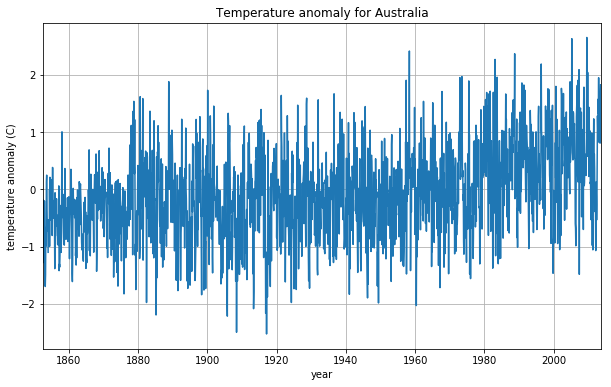

In [5]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())

The data are kind of noisy at this scale so let's calculate a 12-month moving average for a smoother time series.

(1852.5, 2013.6666666666667)

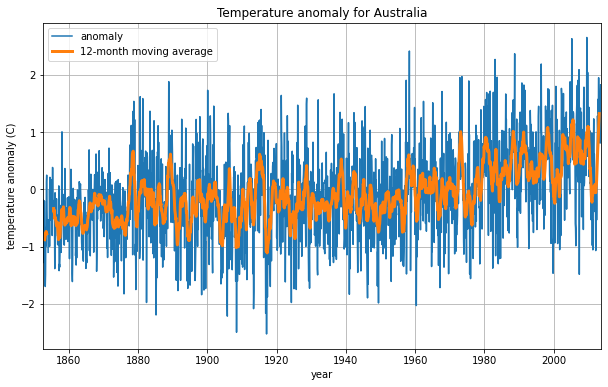

In [30]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly, label="anomaly")
plt.plot(decimal_year, moving_avg(temperature_anomaly,6), label="12-month moving average", linewidth=3)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.legend()
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())

In [51]:
def test_moving_avg():
    avg = moving_avg(np.ones(1000),2)
    assert np.all(np.isnan(avg[0:2]))
    assert np.all(np.isnan(avg[-2:0]))
    assert np.allclose(avg[2:-2],1)    # since float definitions can be different

In [52]:
test_moving_avg()